# Visualization with seaborn

In this notebook, we will see few of the most popular charts out of the hundreds, you can create with seaborn

In [7]:
import seaborn as sns

In [10]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Categorical Scatter plot

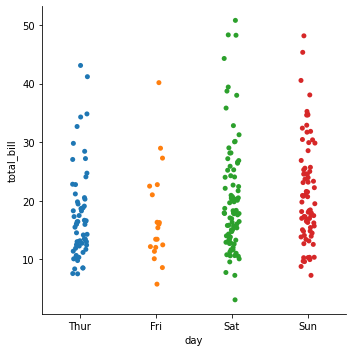

In [8]:
sns.catplot(x="day", y="total_bill", data=tips)

The jitter parameter controls the magnitude of jitter or disables it altogether:

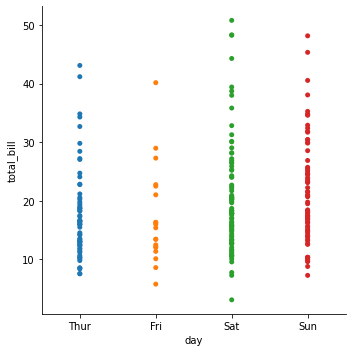

In [9]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

 In these examples, categorical axis always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

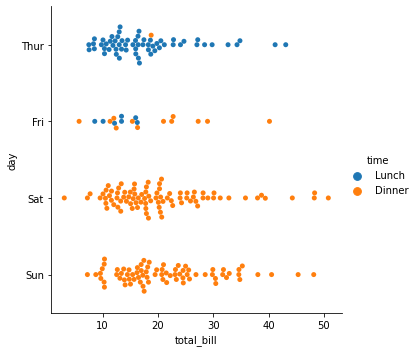

In [11]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## Boxplots
 This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

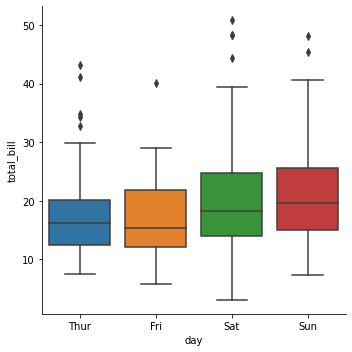

In [12]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

## Bar Plots
In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default).

In [13]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


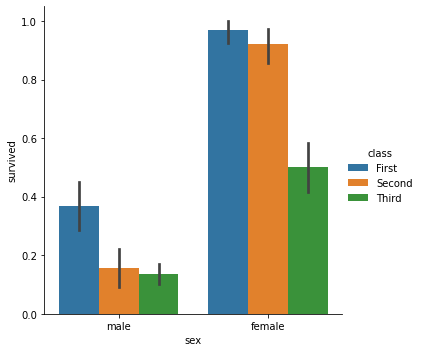

In [14]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

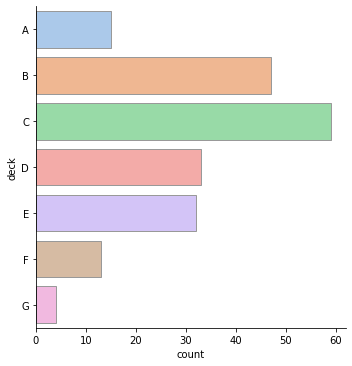

In [15]:
sns.catplot(y="deck", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

## Building structured multi-plot grids
When exploring multi-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice” or “trellis” plotting.
 It allows a viewer to quickly extract a large amount of information about a complex dataset.

The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot.

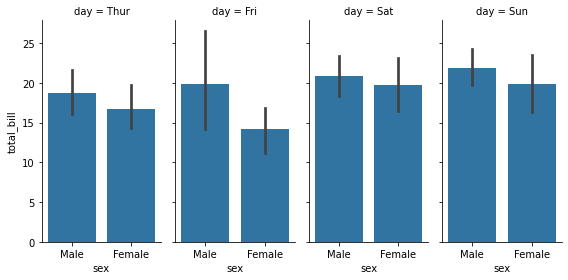

In [22]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

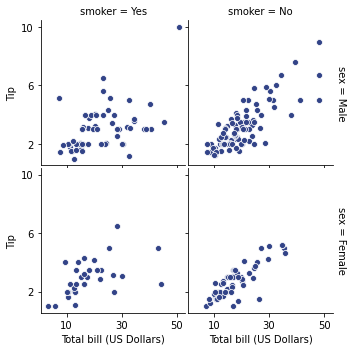

In [23]:
 g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)